Contents under Creative Commons BY 4.0 license and code under MIT license. © Julian Parra 2019. This material is part of the Master of Engineering program by Julian Parra at Universidad EAFIT.

# Time integration


Step by step based methods are general approaches to obtain the system's response to dynamic loading. In these formulations, both the loading and the response history are divided into a sequence of time steps. Each step constitutes an independent analysis where the dynamic problem is solved based in the solution of the previous step. In the finite element method the time dependent system of equations is written like:

<br>



<center>$MA(t)+CV(t)+KU(t)=P(t)$<center>

<br>

where $M$, $C$ and $K$ are standard mass, damping and stiffness finite element-like matrices, while $A(t)$, $V(t)$ and $U(t)$ are generalized acceleration, velocity and displacement nodal vectors. These are termed generalized as they are not necessarily mechanical quantities.

Based on this formulation, it's posible to consider the nonlinear behavior of the system simply by assumming that the assembled properties remain constant during each step and that the change of those properties only happens from one step to the next. Hence, nonlinear analysis becomes a sequence of linear analysis of a changing system (Clough & Penzien, 2003).

Consequently, it is convenient to reformulate the system response in terms of the incremental equation of motion, due to the assumption that in nonlinear analysis the properties of the system remains constant only in short increments of time or deformation.

<br>

<center>$M \Delta A + C \Delta V + K \Delta U = \Delta{P}$</center>

<br>
In this development, the nonlinear behavior is considered in changes in the stiffness contribution. Time integration is conducted through a "$\theta$ Wilson" method.

<img src="img/Algo_ThetaWilson.PNG" alt="files" style="width:498px" align="center"/>

The system's nonlinear response is obtained considering a generalized Newton-Raphson iteration scheme, in which the effective tangent stiffness matrix $K_T$ is calculated at the time $i$ (the beginning of the time step), and that is used through each iteration of changing deformation $\Delta{u}$ within that time step. The tangent stiffness matrix $K_{T_{i}}$ is updated for each iteration until $\Delta{u_{i}}$ it becomes small enough.

<img src="img/NR.png" alt="files" style="width:646px" align="center"/>
<img src="img/Algo_NR.png" alt="files" style="width:385px" align="center"/>

In solving the nonlinear time step, two convergency criteria are considered. The iteration step is deemed to be completed as soon as both the residual forces and the residual deformations ($\Delta{f_{i}}$ and $\Delta{u_{i}}$) are smaller than the tolerance value stablished by the user.

In the following, it will be exposed a comparison between analytical solution of the linear response of a single degree of freedom system due to an armonic loading excitation and the response that is obtained with "The $\theta$ Wilson" step by step procedure:


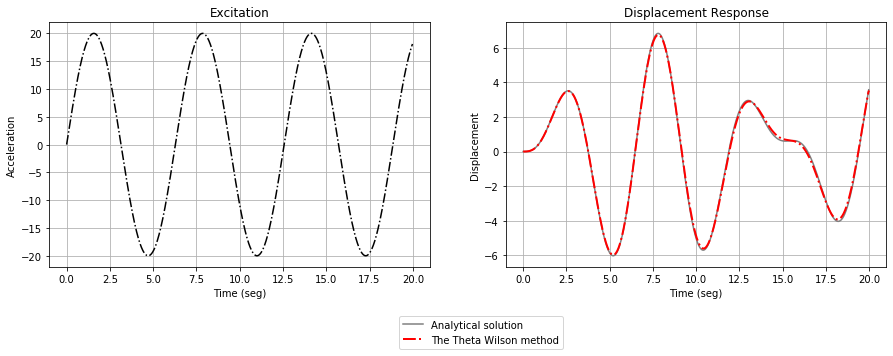

In [1]:
%matplotlib inline 
import sympy as sym
from os import sys
sys.path.append("Scripts")
import Step_Procedures as Stp


M      = 5.0              # Mass of the system
K      = 10.0             # Stiffness of the system
Po     = 20.0             # Amplitude of the wave excitation
W      = 1.0              # Frecuency of the wave excitation
Tt     = 20.0             # Total solution time
DeltaT = 0.02             # Time step for the solution
theta  = 1.40             # Constant integration parameter

#########################################

P    = Stp.Force(Po,W,DeltaT,Tt)
U1,T = Stp.ThetaWilson_Resp(theta,DeltaT,M,K,0.0,P,Tt)
U2   = Stp.AnalyticalSLN(M,K,0.0,0.0,Po,W,DeltaT,Tt)
Fig  = Stp.Plots(P,U1,T,U2)

########################################

### References

Clough, Ray W. and Joseph Penzien. Dynamics of Structures. Third Edition. Computers & Structures Inc, 2003.

Chopra, Anil K. Dynamics of Structures. Fourth Edition. Pearson, 2012.

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./nb_style.css', 'r').read()
    return HTML(styles)
css_styling()